<a href="https://colab.research.google.com/github/MKS310/datalabnotes/blob/main/_code/2023-03-16-Coding_Challenge_for_Fatima_Fellowship_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fatima Fellowship Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. These coding challenges are not meant to take too long, do NOT spend more than 4-6 hours on them -- you can submit whatever you have.

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook along with your application. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw)



---


### **Important**: Beore you get started, please make sure to make a **copy of this notebook** and set sharing permissions so that **anyone with the link can view**. Otherwise, we will NOT be able to assess your application.



---



# 1. Deep Learning for Vision

**Generated by AI detector**: Train a model to detect if images are generated by AI

* Find a dataset of natural images and images generated by AI (here is one such dataset on the [Hugging Face Hub](https://huggingface.co/datasets/competitions/aiornot) but you're welcome to use any dataset you've found.
* Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify the image as being generated by an AI or not until a reasonable accuracy is reached
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/datasets/sadikaljarif/fake-news-detection-dataset-english (if you'd like, you can also look at fake news datasets in other languages, which are available on the Huggingface Hub)
* Develop an NLP model for classification that uses a pretrained language model and the *text* of the article. It should *NOT* use the URL
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 3. Deep RL / Robotics

**RL for Classical Control:** Using any of the [classical control](https://github.com/openai/gym/blob/master/docs/environments.md#classic-control) environments from OpenAI's `gym`, implement a deep NN that learns an optimal policy which maximizes the reward of the environment.

* Describe the NN you implemented and the behavior you observe from the agent as the model converges (or diverges).
* Plot the reward as a function of steps (or Epochs).
Compare your results to a random agent.
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.
* (Optional) [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.


You may use any frameworks you like, but you must implement your NN on your own (no pre-defined/trained models like [`stable_baselines`](https://stable-baselines.readthedocs.io/en/master/)).

You may use any simulator other than `gym` _however_:
* The environment has to be similar to the classical control environments (or more complex like [`robosuite`](https://github.com/ARISE-Initiative/robosuite)).
* You cannot choose a game/Atari/text based environment. The purpose of this challenge is to demonstrate an understanding of basic kinematic/dynamic systems.

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

# 4. Theory / Linear Algebra 

**Implement Contrastive PCA** Read [this paper](https://www.nature.com/articles/s41467-018-04608-8) and implement contrastive PCA in Python.

* First, please discuss what kind of dataset this would make sense to use this method on
* Implement the method in Python (do not use previous implementations of the method if they already exist)
* Then create a synthetic dataset and apply the method to the synthetic data. Compare with standard PCA.


**Write up**: Discuss what kind of dataset it would make sense to use Contrastive PCA


# Discussion:

cPCA offers a way to filter one dataset with another contrast dataset. The contrast contains the information you wish to remove, or desensitize the algorithm for. In the paper, this is called the background data.

This method makes sense to use on datasets with known correlated or confounding variables due to the fact that the method seems to easily filter out the noise from those variables.

I think this has potential in anomaly detection when the 'normal conditions' 
distribution are known. In the area of predictive maintenance, cPCA could remove
the effects of variation that occurs in regular machine usage, 
and potentially uncover more subtle signals that are hard to find.

The cPCA method works best on continuous data with a known control group.
The known control group is useful for creating the background dataset. 
PCA can be used on categorical data that is encoded into numeric values, 
but is more appropriate for continuous values since there are other methods
better suited for categorical data. 


In [19]:
#%%
import numpy as np
from scipy.stats import special_ortho_group
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

## Step 1: Create a synthetic dataset
Supplementary Materials page 2 describes a synthetic dataset with
- 30 features
- 4 groups: red, blue, green, black
- 100 samples for each group
- Features 1-10, all groups sampled from N(0, 10)
- Features 11-20, groups green/blue sampled from N(3, 1)
- Features 11-20, groups red/black sampled from N(-1.5,1)
- Features 21-30, groups green/black sampled from N(-1.5,1)
- Features 21-30, groups red/blue sampled from N(1.5,1)

Background Data contains 400 datapoints sampled from same distribution
- Features 1-10 sampled from N(0,10)
- Features 11-20 sampled from N(0,3)
- Features 21-30 sampled from N(0,1)

Random rotation was applied to both datasets to make it non-trivial to find
the directions that separate the sub-groups in the target dataset.

In [23]:
# Generate the TARGET dataset
np.random.seed(42)

from scipy.stats import truncnorm
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def rotate_dataset(data):
    #X_rotated = np.rot90(data, k=2)
    x = special_ortho_group(seed=42,dim=30).rvs(1)
    X_rotated = np.dot(data, x.T)
    return X_rotated

def generate_target():
    subgroups = ['green','blue','red','black']
    dataset = np.zeros((400, 30))
    labels = np.zeros(400, dtype='<U5')  # initialize labels as empty strings
    for i, group in enumerate(subgroups):
        if group=='red':
            mu1, sigma1 = -1.5, 1 # Features 11-20
            mu2, sigma2 = 1.5, 1  # Features 21-30
        if group=='blue':
            mu1, sigma1 = 3, 1
            mu2, sigma2 = 1.5, 1
        if group=='green':
            mu1, sigma1 = 3, 1
            mu2, sigma2 = -1.5, 1
        if group=='black':
            mu1, sigma1 = -1.5, 1
            mu2, sigma2 = -1.5, 1
        dataset[i * 100:(i + 1) * 100, 0:10] = np.random.default_rng().normal(0,10,(100,10))#(10 - 0) * np.random.random_sample((100,10)) + 0 #[get_truncated_normal(5,2,0,10).rvs(10) for i in range(100)]#
        dataset[i * 100:(i + 1) * 100, 10:20] = np.random.default_rng().normal(mu1,sigma1,(100,10))#(b1 - a1) * np.random.random_sample((100,10)) + a1 #[get_truncated_normal((a1+b1)/2,2,a1,b1).rvs(10) for i in range(100)]#
        dataset[i * 100:(i + 1) * 100, 20:30] = np.random.default_rng().normal(mu2,sigma2,(100,10))#(b2 - a2) * np.random.random_sample((100,10)) + a2 #[get_truncated_normal((a2+b2)/2,2,a2,b2).rvs(10) for i in range(100)]#
        labels[i * 100:(i + 1) * 100] = group
        #np.random.default_rng().normal((a1+b1)/2,2,(100,10))#
    dataset = rotate_dataset(dataset)
    return dataset,labels

#%%
# Generate the BACKGROUND dataset
def generate_background():
    dataset2 = np.zeros((400, 30))

    dataset2[0:400, :10] = np.random.default_rng().normal(0,10,(400,10))#(10 - 0) * np.random.random_sample((400,10)) + 0 #[get_truncated_normal(5,2,0,10).rvs(10) for i in range(400)]#
    dataset2[0:400, 10:20] = np.random.default_rng().normal(0,3,(400,10))#(b1 - a1) * np.random.random_sample((400,10)) + a1 #[get_truncated_normal((a1+b1)/2,2,a1,b1).rvs(10) for i in range(400)]#
    dataset2[0:400, 20:30] = np.random.default_rng().normal(0,1,(400,10))#(b2 - a2) * np.random.random_sample((400,10)) + a2 #[get_truncated_normal((a2+b2)/2,2,a2,b2).rvs(10) for i in range(400)]#
    dataset2 = rotate_dataset(dataset2)
    return dataset2

## Step 2: Apply Contrastive PCA to the Synthetic Dataset

I originally wrote a function for PCA, then modified it for Contrastive PCA per the description in the paper.  This required calculating the Covariance matrix of the background dataset and subtracting it, multiplied by the contrast value, from the covariance matrix of the target dataset. 

For simplicity, I assumed only 2 principal components and didn't do any optimization using % explained variance or a scree plot. 

In [21]:
#Step 2: 
# Apply cPCA

def my_cpca(X, X_bg, contrast, n_comp): #contrast = 0 is same as PCA
    # Center the matrix on the mean
    X_mean = X - X.mean(axis=0)
    X_bg_mean = X_bg - X_bg.mean(axis=0)
    Z = X_mean / X.std(axis=0)
    Z_bg = X_bg_mean / X_bg.std(axis=0)
    #Z= zscore(X, axis=1, nan_policy='omit')
    #Z_bg= zscore(X_bg, axis=1, nan_policy='omit')
    #covariace matrix calculation
    cov_matrix=np.cov(Z)
    cov_matrix_bg=np.cov(Z_bg) 
    C = (cov_matrix - contrast * cov_matrix_bg)
    #calculate eigen values and vectors
    e_values , e_vectors = np.linalg.eig(C)
    #sort the eigen values and vectors in descending order
    sorted_index = np.argsort(e_values)[::-1]
    sorted_e_values = e_values[sorted_index]
    sorted_e_vectors = e_vectors[:,sorted_index]
    e_vector_subset = sorted_e_vectors[:,0:n_comp]
    #transform the data
    #X_reduced = Z.T @ e_vector_subset
    X_reduced = e_vector_subset.T.dot(C).transpose()
    return X_reduced

## Step 3: Plot the results

Produced a simple scatterplot similar to the plot in the supplementary materials of the paper. 

In [4]:
def plot_results(data, a):
     
    plt.figure(figsize = (6,6))
    sb.scatterplot(data = data , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , 
                   palette ={'green':'green','blue':'blue','red':'red','black':'black'}
                   ).set_title(f'Contrast Value={a}')
    plt.show()

    return

## Step 4: Run the Experiment

I generated a target dataset and background dataset using the information in the Supplementary materials, then looped through a hand-picked list of contrast values (contrast value of 0 corresponds to regular PCA) and plotted the results. 

Unfortunately, I was not able to replicate the results. I think that my synthetic dataset is incorrect. As I was troubleshooting, I found errors in how I sampled the data. I also had trouble rotating the dataset as described in the paper. In the first run, I attempt rotation. In the following run, I leave out the rotation, but the problem becomes trivial. 

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


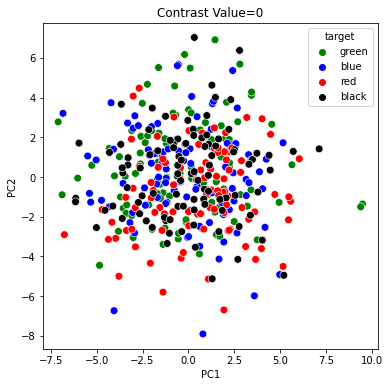

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


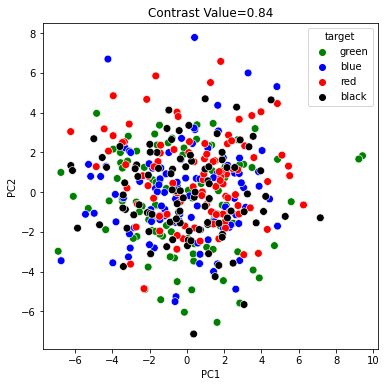

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


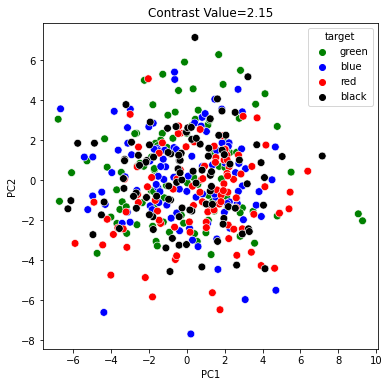

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


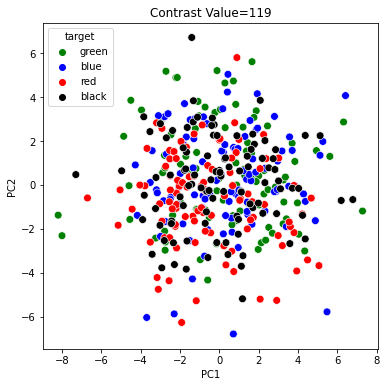

In [24]:
#%%
# Run Experiment
X,labels= generate_target()
X_bg = generate_background()

for alpha in [0, 0.84, 2.15, 119]:
    X_cpca = my_cpca(X, X_bg, alpha, 2)
    principal_df = pd.DataFrame(X_cpca, columns = ['PC1','PC2'])
    #Add target variable back to dataset
    principal_df = pd.concat([principal_df , pd.DataFrame(labels, columns=['target'])] , axis = 1)
    plot_results(principal_df, alpha)
#%%

## Exp. attempt 2

Below, I attempted the experiment again without rotating the synthetic dataset and the problem becomes trivial, as mentioned in the supplementary materials to the paper. 



/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


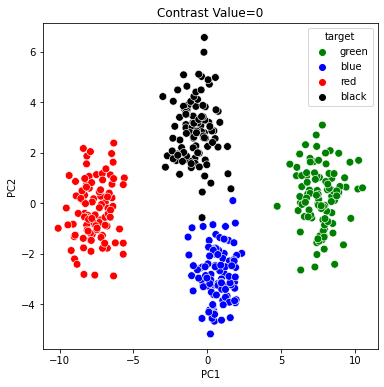

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


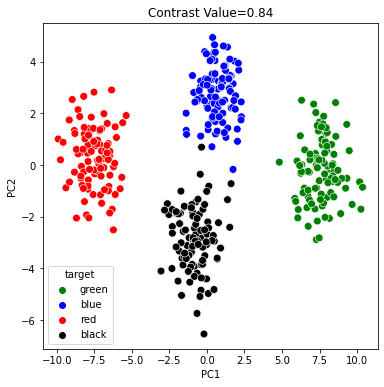

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


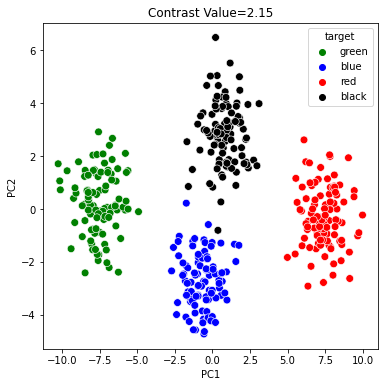

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


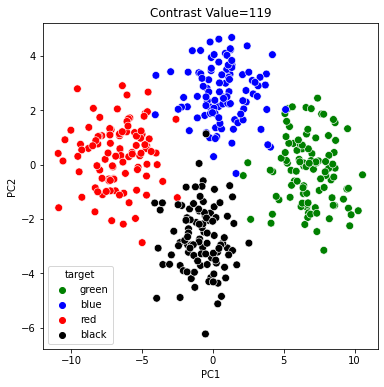

In [25]:

def rotate_dataset(data):
    #X_rotated = np.rot90(data, k=2)
    #x = special_ortho_group(seed=42,dim=30).rvs(1)
    #X_rotated = np.dot(data, x.T)
    return data


# Run Experiment
X,labels= generate_target()
X_bg = generate_background()

for alpha in [0, 0.84, 2.15, 119]:
    X_cpca = my_cpca(X, X_bg, alpha, 2)
    principal_df = pd.DataFrame(X_cpca, columns = ['PC1','PC2'])
    #Add target variable back to dataset
    principal_df = pd.concat([principal_df , pd.DataFrame(labels, columns=['target'])] , axis = 1)
    plot_results(principal_df, alpha)
#%%

# 5. Systems

**Inference on the edge**: Measure the inference times in various computationally-constrained settings

* Pick a few different speech detection models (we suggest looking at models  on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads))
* Simulate different memory constraints and CPU allocations that are realistic for edge devices that might run such models, such as smart speakers or microcontrollers, and measure what is the average inference time of the models under these conditions 
* How does the inference time vary with (1) choice of model (2) available system memory (3) available CPU (4) size of input?

Are there any surprising discoveries? (Note that this coding challenge is fairly open-ended, so we will be considering the amount of effort invested in discovering something interesting here).

In [ ]:
### WRITE YOUR CODE HERE


# Test Subjects:
  # Raspberry Pi 
  # Jetson Nano 
  # Amazon Alexa
  # iPhone
  # 
# dependent variables:
  # Models: openwhisper tiny, 
  # System Memory:
  # Available CPU:
  # Size of Input: 
# independent variable: 
# Hypothesis 1: 
# Hypothesis 2: 
# Hypothesis 3:
# Experiment 1:
# Experiment 2:
# Experiment 3:

**Write up**: What surprising discoveries do you see?

[Please put your write up here]